In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#import warnings
#warnings.simplefilter(action="ignore",category=FutureWarning)

In [5]:
XY=pd.read_csv("five-small-clouds.csv")
XY[:5]

,x,y,group
0,0.299560,-0.831858,0.0
1,-0.519715,-0.431702,0.0
2,0.470118,0.858092,0.0
3,0.377190,0.150124,0.0
4,0.700158,1.053488,0.0


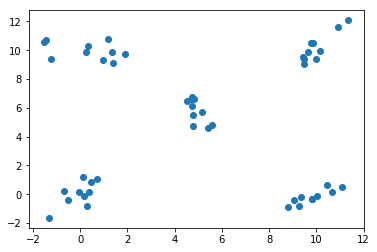

In [6]:
xx=np.array(XY["x"])
yy=np.array(XY["y"])
plt.scatter(xx,yy)

In [7]:
def visualize_clasifier_contours(clf,X,Y,DX,DY,colors,markers,xlab="X",
                                thelevels=[.5,1.5,2.5,3.5],
                                ylab="Y",xlim=[-.1, 1.1],ylim=[-.1, 1.1]):
    xinterval = X[:, 0].min() - 1, X[:, 0].max() + 1
    yinterval = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(*xinterval, DX),
                         np.arange(*yinterval, DY))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=plt.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=plt.contourf(xx, yy, Z, alpha=.1)

  
    nclasses=len(colors)
    for i in range(nclasses):
        #x,y=zip(*X[Y==i]) 
        x,y=(X[Y==i].T).tolist() # is equivalent to x,y=zip(*X[Y==i])
        plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)

    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid()
    fig=plt.gcf()
    fig.tight_layout()
    fig.set_size_inches(6,6)

In [16]:
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [11]:
X=np.array(XY[["x","y"]])
X=scaler.fit_transform(X)

In [12]:
Y=np.array(XY["group"])

In [29]:
r=ANN(solver="lbfgs", alpha=1e-5, 
     hidden_layer_sizes=(100,100,100), 
     random_state=1)

In [30]:
r.fit(X,Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

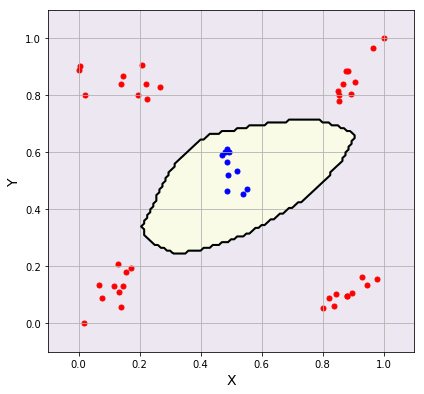

In [31]:
colors=["red", "blue"]
markers=[".", "."]
visualize_clasifier_contours(r,X,Y,.01,.01,colors,markers)

In [33]:
data=pd.read_csv("test_scores.csv")
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,F
0,90,92,0,85,93,0,85,80
1,95,85,65,68,63,29,59,45
2,80,60,50,0,48,50,58,42
3,57,80,72,67,79,58,80,63
4,74,98,84,95,75,79,76,74
5,87,97,77,97,58,58,96,61
6,90,70,80,85,60,0,89,59
7,52,75,42,65,63,45,73,51
8,0,100,95,93,80,74,75,66
9,70,35,0,70,40,51,54,41


In [35]:
X=np.array(data.drop(columns=["F"]))
X[:5]

array([[90, 92,  0, 85, 93,  0, 85],
       [95, 85, 65, 68, 63, 29, 59],
       [80, 60, 50,  0, 48, 50, 58],
       [57, 80, 72, 67, 79, 58, 80],
       [74, 98, 84, 95, 75, 79, 76]])

In [36]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
Y=np.array([1 if value >= 65 else 0 for value in data["F"]])

In [41]:
splits=1000
accs=[]
for j in range(splits):
    xtrain, xtest,ytrain,ytest=train_test_split(X,Y)
    r=LR().fit(xtrain,ytrain)
    YP=r.predict(xtest)
    accs.append(accuracy_score(ytest,YP))


Text(0.5, 1.0, 'Logistic')

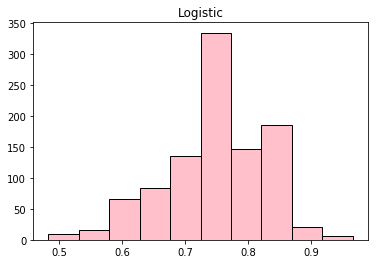

In [42]:
plt.hist(accs,edgecolor="k", color="pink")
plt.title("Logistic")

In [49]:
splits=1000
accs2=[]
for j in range(splits):
    xtrain, xtest,ytrain,ytest=train_test_split(X,Y)
    xtraint=scaler.fit_transform(xtrain)
    xtestt=scaler.fit_transform(xtest)
    
    r2=ANN(hidden_layer_sizes=(3,4,3), alpha=1e-5, solver="lbfgs")
    r2.fit(xtraint,ytrain)
    
    YP2=r2.predict(xtestt)
    accs2.append(accuracy_score(ytest,YP2))


/home/mathman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


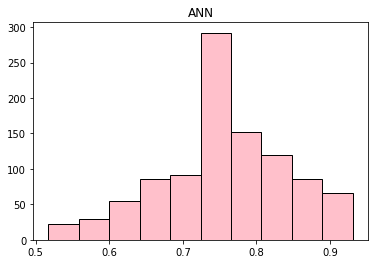

In [50]:
plt.hist(accs2,edgecolor="k", color="pink")
plt.title("ANN");

In [52]:
abs=pd.read_csv("abalone.csv")
abs[:5]

,gender,length,diameter,height,whole-wt,shucked-wt,viscera-wt,shell-wt,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [53]:
rings=np.array(abs["rings"])

(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

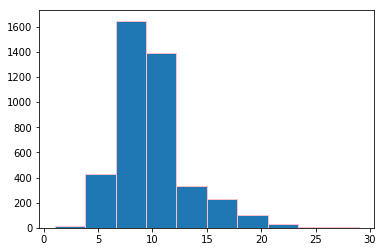

In [54]:
plt.hist(rings,edgecolor="pink")

In [58]:
x=np.linspace(0,100,101)
percentiles=np.percentile(rings,x)

In [59]:
len(x),len(percentiles)

(101, 101)

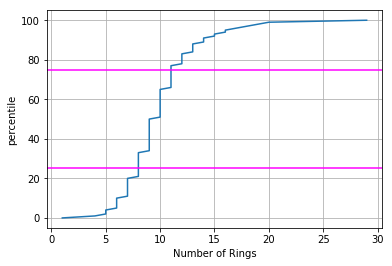

In [64]:
plt.plot(percentiles,x)
plt.xlabel("Number of Rings")
plt.ylabel("percentile")
plt.axhline(y=75,c="magenta")
plt.axhline(y=25,c="magenta")

plt.grid()

In [65]:
import scipy

In [67]:
scipy.stats.scoreatpercentile(rings,(25,50,75))

/home/mathman/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


array([ 8.,  9., 11.])

In [69]:
Y=[]
for value in rings:
    if value <8:
        Y.append(0)
    elif value>11:
        Y.append(2)
    else:
        Y.append(1)
Y=np.array(Y)
Y

array([2, 0, 1, ..., 1, 1, 2])